In [1]:
import numpy as np
import pandas as pd # data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans # KMeans clustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve)
from sklearn.linear_model import LogisticRegression




In [2]:
#read file
content_df_folder = '/Users/cdoctor/Machine Learning/MeCfsBiology/Data_German/augmenta-oncimmune_assay_data_export_for_rti.tsv'
individual_df_folder = '/Users/cdoctor/Machine Learning/MeCfsBiology/Data_German/augmenta-oncimmune_phenotype_export_for_rti.tsv'

content_df = pd.read_csv(content_df_folder, sep='\t', index_col=0)
individual_df = pd.read_csv(individual_df_folder, sep='\t', index_col=0)
content_df_transposed = content_df.T
individual_df_transposed = individual_df.T


In [3]:
#convert row to column
content_df_transposed.shape

(103, 1134)

In [1419]:
individual_df.shape

(103, 4)

In [1420]:
individual_df.index

Index(['COR-7349-D2-POST', 'COR-6215-D2-POST', 'COR-3717-D2-POST',
       'COR-8330-D2-POST', 'COR-8763-D2-POST', 'COR-4361-D2-POST',
       'COR-8843-D2-POST', 'COR-9546-D2-POST', 'COR-1481-D2-POST',
       'COR-5218-D2-POST',
       ...
       'COR-9504-D2-POST', 'COR-6813-D2-POST', 'COR-1699-D2-POST',
       'COR-9633-D2-POST', 'COR-5449-D2-POST', 'COR-5530-D2-POST',
       'COR-5800-Other', 'COR-4582-D1-PRE', 'COR-6048-D1-PRE',
       'COR-3676-Other'],
      dtype='object', name='ParticipantID', length=103)

In [1421]:
content_df_transposed.index.name = 'ParticipantID'

In [1422]:
merged_df = content_df_transposed.join(individual_df, how='inner')
y= merged_df['Phenotype']

In [1423]:
individual_df.head()

,Sample_Source,timepoint,cor_id,Phenotype
ParticipantID,,,,
COR-7349-D2-POST,Plasma,D2-POST,COR-7349,ME/CFS
COR-6215-D2-POST,Plasma,D2-POST,COR-6215,ME/CFS
COR-3717-D2-POST,Plasma,D2-POST,COR-3717,ME/CFS
COR-8330-D2-POST,Plasma,D2-POST,COR-8330,ME/CFS
COR-8763-D2-POST,Plasma,D2-POST,COR-8763,ME/CFS


In [1424]:
content_df_transposed.head()

Molecule,ANXA2,ARHGEF11,ASB9,B2M,CACYBP,CCNE2,DDX5,CDKN2B,CSTA,GRB2,...,AGT,FRK,ARID1A,ARID1A.1,SLC30A8,TG,cFBG,RefPro_SNRPA.2,RefPro_TRIM21.2,RefPro_SNRPB2.2
ParticipantID,,,,,,,,,,,,,,,,,,,,,
COR-7349-D2-POST,7.417853,6.813781,7.523562,6.643856,8.134426,6.768184,6.954196,8.312883,6.339850,8.577429,...,8.179909,7.721099,6.900867,7.426265,7.033423,5.491853,8.068778,12.325305,8.693487,10.482808
COR-6215-D2-POST,8.977280,6.882643,9.906139,7.654636,9.350939,7.303781,8.000000,8.900867,7.426265,8.751544,...,8.118941,9.590587,7.247928,6.971544,7.968667,5.930737,8.243174,11.620678,10.133142,11.302639
COR-3717-D2-POST,8.022368,6.375039,6.977280,6.499846,8.948367,6.366322,7.888743,8.317413,5.882643,9.820179,...,6.948367,11.810572,6.409391,5.930737,13.079151,6.636625,7.960002,10.328675,7.447083,10.770664
COR-8330-D2-POST,9.273796,7.098032,7.813781,7.851749,9.810572,7.888743,8.238405,9.398744,7.087463,9.477758,...,7.189825,9.238405,6.965784,6.108524,7.531381,5.930737,8.108524,10.333155,8.361944,9.715962
COR-8763-D2-POST,8.612868,6.636625,7.124121,7.189825,9.153552,7.129283,7.700440,8.957102,6.400879,9.269127,...,6.988685,8.266787,5.930737,5.523562,9.312883,5.321928,8.108524,9.897089,6.930737,10.041659


In [1425]:
merged_df.head()

,ANXA2,ARHGEF11,ASB9,B2M,CACYBP,CCNE2,DDX5,CDKN2B,CSTA,GRB2,...,SLC30A8,TG,cFBG,RefPro_SNRPA.2,RefPro_TRIM21.2,RefPro_SNRPB2.2,Sample_Source,timepoint,cor_id,Phenotype
ParticipantID,,,,,,,,,,,,,,,,,,,,,
COR-7349-D2-POST,7.417853,6.813781,7.523562,6.643856,8.134426,6.768184,6.954196,8.312883,6.339850,8.577429,...,7.033423,5.491853,8.068778,12.325305,8.693487,10.482808,Plasma,D2-POST,COR-7349,ME/CFS
COR-6215-D2-POST,8.977280,6.882643,9.906139,7.654636,9.350939,7.303781,8.000000,8.900867,7.426265,8.751544,...,7.968667,5.930737,8.243174,11.620678,10.133142,11.302639,Plasma,D2-POST,COR-6215,ME/CFS
COR-3717-D2-POST,8.022368,6.375039,6.977280,6.499846,8.948367,6.366322,7.888743,8.317413,5.882643,9.820179,...,13.079151,6.636625,7.960002,10.328675,7.447083,10.770664,Plasma,D2-POST,COR-3717,ME/CFS
COR-8330-D2-POST,9.273796,7.098032,7.813781,7.851749,9.810572,7.888743,8.238405,9.398744,7.087463,9.477758,...,7.531381,5.930737,8.108524,10.333155,8.361944,9.715962,Plasma,D2-POST,COR-8330,ME/CFS
COR-8763-D2-POST,8.612868,6.636625,7.124121,7.189825,9.153552,7.129283,7.700440,8.957102,6.400879,9.269127,...,9.312883,5.321928,8.108524,9.897089,6.930737,10.041659,Plasma,D2-POST,COR-8763,ME/CFS


In [1426]:
y.head()

ParticipantID
COR-7349-D2-POST    ME/CFS
COR-6215-D2-POST    ME/CFS
COR-3717-D2-POST    ME/CFS
COR-8330-D2-POST    ME/CFS
COR-8763-D2-POST    ME/CFS
Name: Phenotype, dtype: object

In [1427]:
X_train, X_test, y_train, y_test = train_test_split(
    merged_df, y, test_size=0.2, stratify=y, random_state=42
)

In [1428]:

num_features = X_train.select_dtypes(include=np.number).columns.to_list()
cat_features = X_train.select_dtypes(include=['object']).columns.to_list()

preprocessor = make_column_transformer((StandardScaler(), num_features),
                                      (OneHotEncoder(), cat_features)
                                      )
scaled_data = preprocessor.fit_transform(X_train)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)

[0.4790928  0.06479642]


In [1429]:
principal_components[:5]

array([[ 21.07797517, -12.11464119],
       [ 40.73198121,  -4.5015725 ],
       [ -1.88349351,   3.81380222],
       [  9.5361347 ,  -8.3619622 ],
       [ -8.40696261,  -1.83049373]])

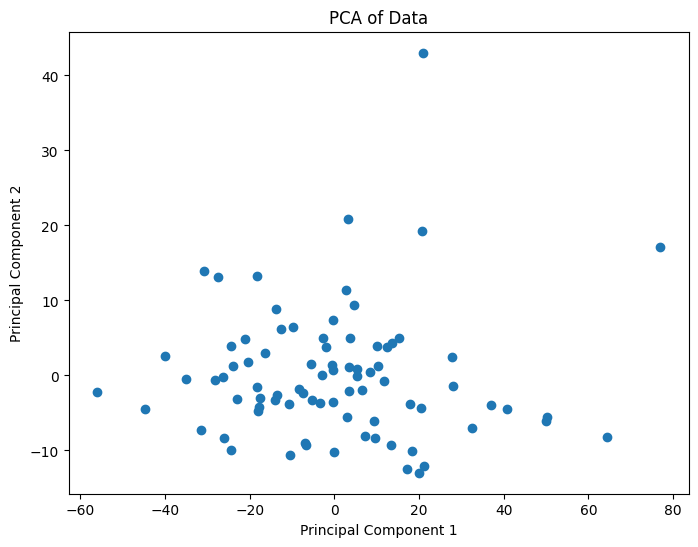

In [1430]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data')
plt.show()

# K-Means Clustering

In [1431]:
# PCA(n_components=2) above
# X_train, y_train: Get from train_test_split 

pc_df = pd.DataFrame(
    principal_components,
    columns=['PC1', 'PC2'],
    index=X_train.index  # Align index to sample IDs
)

# Attach phenotype for later crosstab and evaluation
pc_df['Phenotype'] = y_train.loc[pc_df.index]

pc_df.head()


,PC1,PC2,Phenotype
ParticipantID,,,
COR-2349-D2-POST,21.077975,-12.114641,ME/CFS
COR-8066-D2-POST,40.731981,-4.501573,ME/CFS
COR-6685-D2-POST,-1.883494,3.813802,HC
COR-3315-D2-POST,9.536135,-8.361962,HC
COR-9198-D2-POST,-8.406963,-1.830494,ME/CFS


In [1432]:
# Select number of clusters
k = 3

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=20
)

# Only use the two principal components for clustering
pc_df['Cluster'] = kmeans.fit_predict(pc_df[['PC1', 'PC2']])

# Clustering evaluation metrics
sil = silhouette_score(pc_df[['PC1', 'PC2']], pc_df['Cluster'])
ari = adjusted_rand_score(pc_df['Phenotype'], pc_df['Cluster'])

print(f"Silhouette score: {sil:.3f}")
print(f"Adjusted Rand Index (vs Phenotype): {ari:.3f}")

print("\nCluster vs Phenotype contingency table:")
display(pd.crosstab(pc_df['Cluster'], pc_df['Phenotype']))


Silhouette score: 0.447
Adjusted Rand Index (vs Phenotype): 0.066

Cluster vs Phenotype contingency table:


Phenotype,HC,ME/CFS
Cluster,,
0,8,22
1,1,8
2,26,17


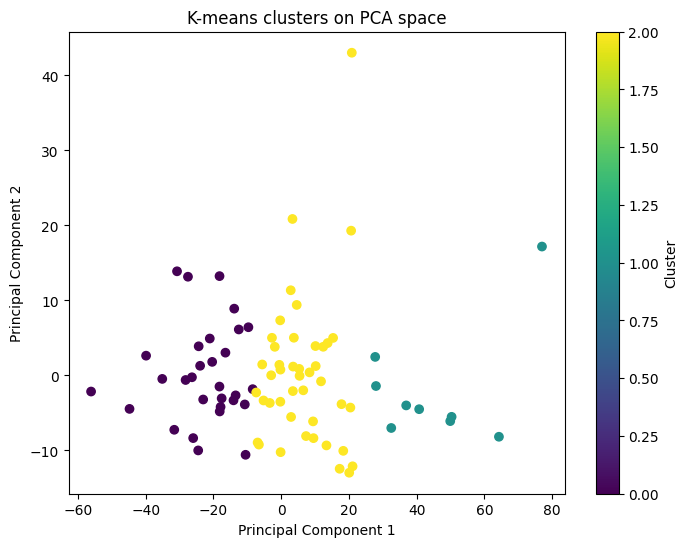

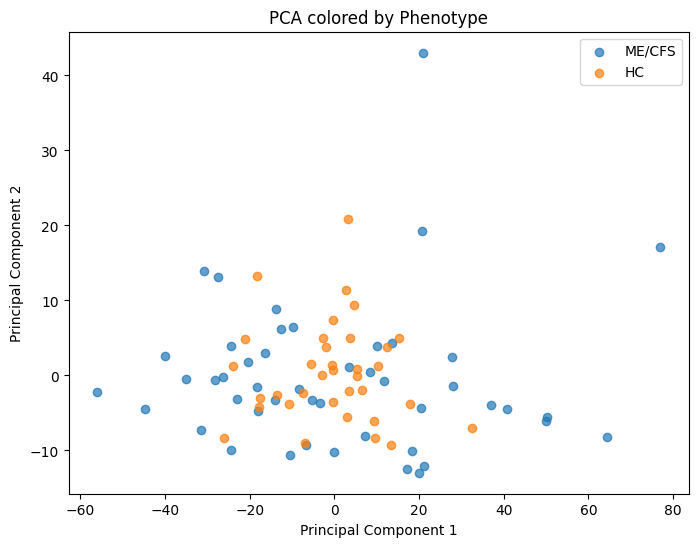

In [1433]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pc_df['PC1'],
    pc_df['PC2'],
    c=pc_df['Cluster'],
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means clusters on PCA space')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Draw another plot colored by Phenotype for visual comparison
plt.figure(figsize=(8, 6))
phenotypes = pc_df['Phenotype'].unique()
for ph in phenotypes:
    subset = pc_df[pc_df['Phenotype'] == ph]
    plt.scatter(subset['PC1'], subset['PC2'], label=ph, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA colored by Phenotype')
plt.legend()
plt.show()


In [1434]:
# First, attach the clustering results back to merged_df
df_with_clusters = merged_df.loc[pc_df.index].copy()
df_with_clusters['Cluster'] = pc_df['Cluster']

# biomarker columns: from the original assay matrix
biomarker_cols = content_df_transposed.columns

# Target phenotype label 
target_label = 'ME/CFS'

print("Phenotype unique values:", df_with_clusters['Phenotype'].unique())

if target_label not in df_with_clusters['Phenotype'].unique():
    print(f"Warning: '{target_label}' not found in Phenotype column. Please check the actual phenotype names and update target_label accordingly.")
else:
    # Calculate proportion of ME/CFS in each cluster
    cluster_ph_table = pd.crosstab(
        df_with_clusters['Cluster'],
        df_with_clusters['Phenotype'],
        normalize='index'
    )

    display(cluster_ph_table)

    # Find the cluster with the highest proportion of ME/CFS
    me_cluster = cluster_ph_table[target_label].idxmax()
    print(f"\nCluster enriched for {target_label}: {me_cluster}")

    # That cluster vs other clusters
    me_mask = df_with_clusters['Cluster'] == me_cluster
    other_mask = ~me_mask

    # Calculate mean difference for each biomarker: (ME/CFS enriched cluster) - (other clusters)
    mean_me = df_with_clusters.loc[me_mask, biomarker_cols].mean()
    mean_other = df_with_clusters.loc[other_mask, biomarker_cols].mean()
    mean_diff = mean_me - mean_other

    # Select top N biomarkers by absolute difference
    abs_diff = mean_diff.abs().sort_values(ascending=False)
    top_n = 20
    top_biomarkers = abs_diff.head(top_n).index

    result_df = pd.DataFrame({
        'mean_ME_cluster': mean_me[top_biomarkers],
        'mean_other_clusters': mean_other[top_biomarkers],
        'diff_ME_minus_others': mean_diff[top_biomarkers],
        'abs_diff': abs_diff[top_biomarkers],
    }).sort_values('abs_diff', ascending=False)

    print(f"\nTop {top_n} candidate biomarkers potentially associated with {target_label}:")
    display(result_df)


Phenotype unique values: ['ME/CFS' 'HC']


Phenotype,HC,ME/CFS
Cluster,,
0,0.266667,0.733333
1,0.111111,0.888889
2,0.604651,0.395349



Cluster enriched for ME/CFS: 1

Top 20 candidate biomarkers potentially associated with ME/CFS:


,mean_ME_cluster,mean_other_clusters,diff_ME_minus_others,abs_diff
Molecule,,,,
INHBA,11.009384,8.081116,2.928268,2.928268
IL33,10.734278,7.814524,2.919754,2.919754
HIST1H2BD,11.801334,8.946403,2.854931,2.854931
PRKCI,11.019989,8.179582,2.840407,2.840407
A1BG,9.409765,6.571888,2.837877,2.837877
H1FX,11.473407,8.666924,2.806483,2.806483
CLU,11.930152,9.126726,2.803427,2.803427
ATF3,11.593502,8.805494,2.788008,2.788008
TSGA10,10.800425,8.012869,2.787556,2.787556


# Random Forest Classification

In [1435]:
# === X: PCA components + selected biomarkers ===

X_rf = pd.concat([
    pc_df[['PC1', 'PC2']],
    df_with_clusters[top_biomarkers]
], axis=1)

# === y: Phenotype label ===
y_rf = df_with_clusters['Phenotype']

print("X_rf shape:", X_rf.shape)
print("y_rf distribution:")
print(y_rf.value_counts())

target_label = 'ME/CFS'   
y_binary = (y_rf == target_label).astype(int)


X_rf shape: (82, 22)
y_rf distribution:
Phenotype
ME/CFS    47
HC        35
Name: count, dtype: int64


In [1436]:
X_rf.head()

,PC1,PC2,INHBA,IL33,HIST1H2BD,PRKCI,A1BG,H1FX,CLU,ATF3,...,RBM15,CD101,PFN2,KDM4A,IL1F10,DDIT3,GRK6,RPS2,CTSH,EPHA7
ParticipantID,,,,,,,,,,,,,,,,,,,,,
COR-2349-D2-POST,21.077975,-12.114641,10.386940,9.918118,10.939946,9.413628,6.832890,10.811375,11.334832,11.355351,...,9.568906,9.704768,10.621136,11.397675,10.062721,11.123475,10.490350,10.888363,9.686501,7.832890
COR-8066-D2-POST,40.731981,-4.501573,10.624795,10.496854,11.591990,12.868823,11.129283,11.413628,11.943064,11.160817,...,10.084144,10.304351,11.251778,12.073807,10.668885,11.778077,11.150699,11.568906,10.337064,8.645658
COR-6685-D2-POST,-1.883494,3.813802,7.710806,7.531381,8.603626,8.881114,5.977280,8.262095,8.839204,8.353147,...,7.658211,7.665336,9.980140,9.177420,7.434628,8.804131,8.074141,8.515700,7.361944,5.882643
COR-3315-D2-POST,9.536135,-8.361962,8.876517,9.067434,10.188589,8.741467,6.658211,10.022368,10.343186,9.552669,...,8.748193,8.971544,9.887221,10.671541,9.357552,10.455327,9.605480,10.086800,9.063395,7.442943
COR-9198-D2-POST,-8.406963,-1.830494,8.266787,7.942515,8.856426,8.055282,6.238405,8.438792,8.686501,8.216746,...,8.149747,7.483816,8.479780,8.975848,7.832890,8.972980,8.539159,8.726218,7.285402,6.118941


In [1437]:
#Train-test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_binary,
    test_size=0.2,
    random_state=42,
    stratify=y_binary
)

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_rf, y_train_rf)


RandomForestClassifier(min_samples_leaf=5, n_estimators=500, n_jobs=-1,
                       random_state=42)

Accuracy: 0.765
AUC: 0.743

Classification Report:
              precision    recall  f1-score   support

     Control       0.71      0.71      0.71         7
      ME/CFS       0.80      0.80      0.80        10

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17



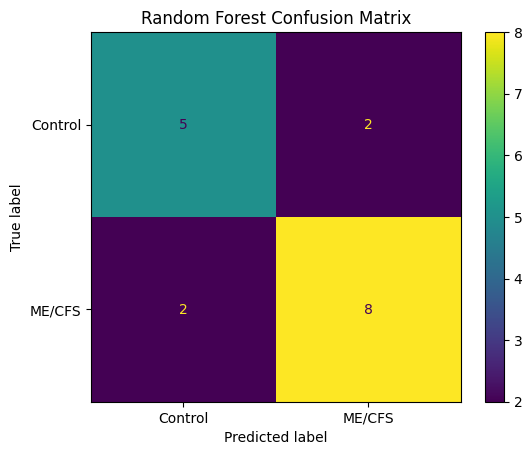

In [1438]:
# Prediction
y_pred = rf.predict(X_test_rf)
y_prob = rf.predict_proba(X_test_rf)[:, 1]

acc = accuracy_score(y_test_rf, y_pred)
auc = roc_auc_score(y_test_rf, y_prob)

print(f"Accuracy: {acc:.3f}")
print(f"AUC: {auc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test_rf, y_pred, target_names=['Control', 'ME/CFS']))

# Confusion matrix visualization
cm = confusion_matrix(y_test_rf, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Control', 'ME/CFS'])
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()


,Feature,Importance
5,PRKCI,0.089934
21,EPHA7,0.087792
0,PC1,0.086660
9,ATF3,0.066987
6,A1BG,0.066099
18,GRK6,0.054328
2,INHBA,0.047997
7,H1FX,0.043565
20,CTSH,0.041777
17,DDIT3,0.041500


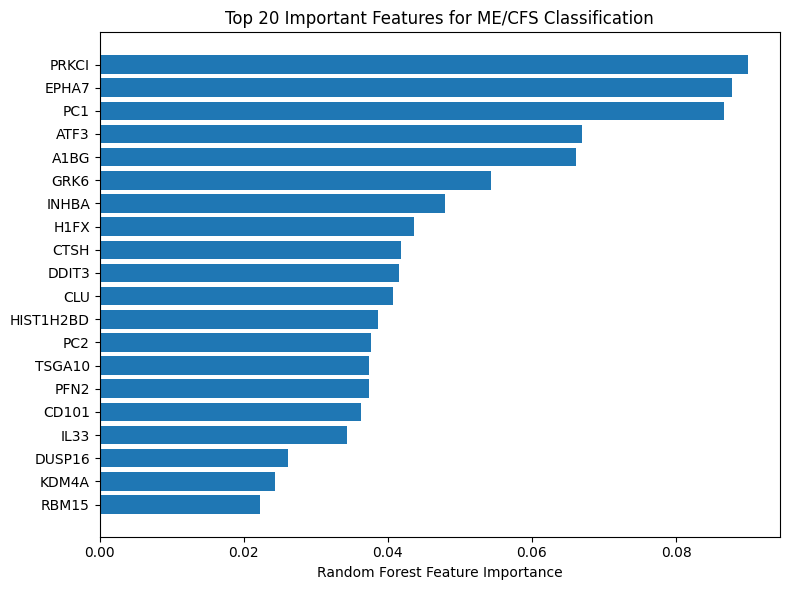

In [1439]:
# Feature importance
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_rf.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

display(feature_importance_df.head(20))

# Plot top 20 important features
top_k = 20
top_features = feature_importance_df.head(top_k)

plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1])
plt.xlabel("Random Forest Feature Importance")
plt.title("Top 20 Important Features for ME/CFS Classification")
plt.tight_layout()
plt.show()



# RFC Using Biomarker Only as reference

In [1440]:
X_biomarker_only = df_with_clusters[top_biomarkers]

X_train_bm, X_test_bm, y_train_bm, y_test_bm = train_test_split(
    X_biomarker_only, y_binary,
    test_size=0.2,
    random_state=42,
    stratify=y_binary
)

rf_bm = RandomForestClassifier(
    n_estimators=500,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_bm.fit(X_train_bm, y_train_bm)

y_pred_bm = rf_bm.predict(X_test_bm)
y_prob_bm = rf_bm.predict_proba(X_test_bm)[:, 1]

acc_bm = accuracy_score(y_test_bm, y_pred_bm)
auc_bm = roc_auc_score(y_test_bm, y_prob_bm)

print(f"[Biomarker only] Accuracy: {acc_bm:.3f}")
print(f"[Biomarker only] AUC: {auc_bm:.3f}")


[Biomarker only] Accuracy: 0.706
[Biomarker only] AUC: 0.757


The integration of PCA-derived components improved the overall classification accuracy of the random forest model (0.765 vs 0.706), indicating enhanced robustness and noise reduction. Although the AUC of the biomarker-only model was slightly higher (0.757 vs 0.743), the difference was marginal, suggesting comparable discriminative performance. Considering both accuracy and model stability, the PCA-integrated random forest was selected as the primary predictive model.

# Logistic Regression (L2)

In [1441]:
# === Step 1: Train-test split ===
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_rf, y_binary,
    test_size=0.2,
    random_state=42069,
    stratify=y_binary
)

#X_rf: reduced dataset from PCA
#y_binary: Participant ID vs 0/1 value (1=MeCfs Patient, 2=Healthy Control) 

In [1442]:
# === Step 2: Scale Features to Reduce Bias ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_lr)
X_test_scaled = scaler.transform(X_test_lr)

In [1443]:
# === Step 3: Train Logistic Regression ===
lr = LogisticRegression(
    solver='liblinear',  # good for small datasets, binary classification
    penalty='l2',
    C=1.0,
    random_state=42
)
lr.fit(X_train_scaled, y_train_lr)

LogisticRegression(random_state=42, solver='liblinear')

In [1444]:
# === Step 4: Make Predictions ===
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (ME/CFS)

In [1445]:
# === Step 5: Evaluate Performance ===
acc = accuracy_score(y_test_lr, y_pred)
auc = roc_auc_score(y_test_lr, y_prob)

print(f"Logistic Regression Accuracy: {acc:.3f}")
print(f"Logistic Regression AUC: {auc:.3f}\n")
print("Classification Report:")
print(classification_report(y_test_lr, y_pred, target_names=['Control', 'ME/CFS']))

Logistic Regression Accuracy: 0.412
Logistic Regression AUC: 0.443

Classification Report:
              precision    recall  f1-score   support

     Control       0.20      0.14      0.17         7
      ME/CFS       0.50      0.60      0.55        10

    accuracy                           0.41        17
   macro avg       0.35      0.37      0.36        17
weighted avg       0.38      0.41      0.39        17



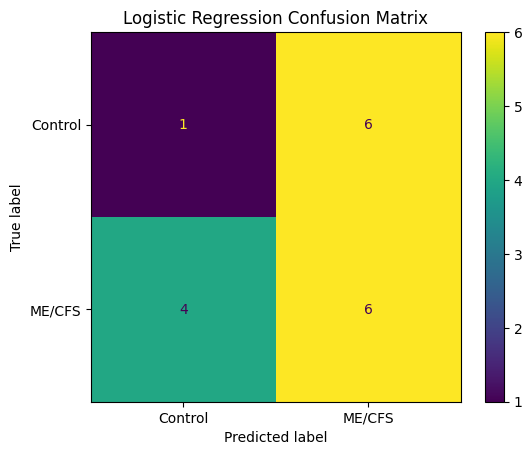

In [1446]:
# === Step 6: Compute & Plot Confusion Matrix ===
cm = confusion_matrix(y_test_lr, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Control', 'ME/CFS'])
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

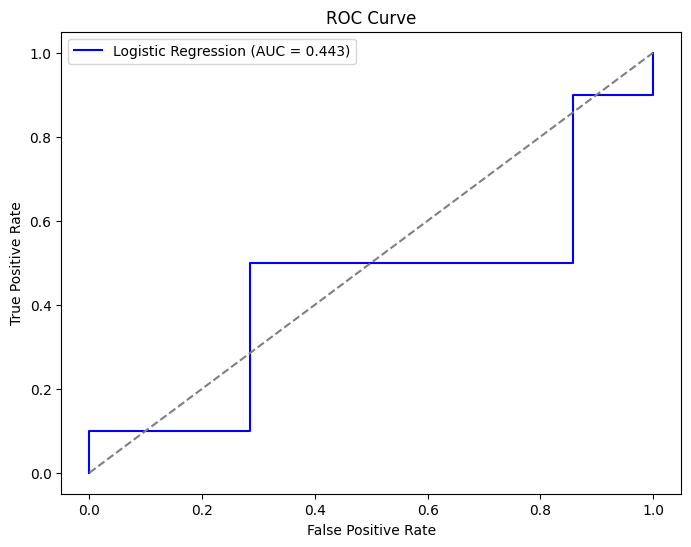

In [1447]:
# === Step 7: ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_test_lr, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [1448]:
# === Step 8: List Coefficients ===
coefficients = pd.DataFrame({
    'Feature': X_rf.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False)

print("Top features by absolute logistic regression coefficient:")
display(coefficients.head(20))

Top features by absolute logistic regression coefficient:


,Feature,Coefficient
5,PRKCI,-0.656483
8,CLU,-0.614182
3,IL33,0.608815
17,DDIT3,0.604424
7,H1FX,0.604270
20,CTSH,0.501075
12,RBM15,-0.448396
14,PFN2,0.442867
16,IL1F10,-0.389023
21,EPHA7,0.337790


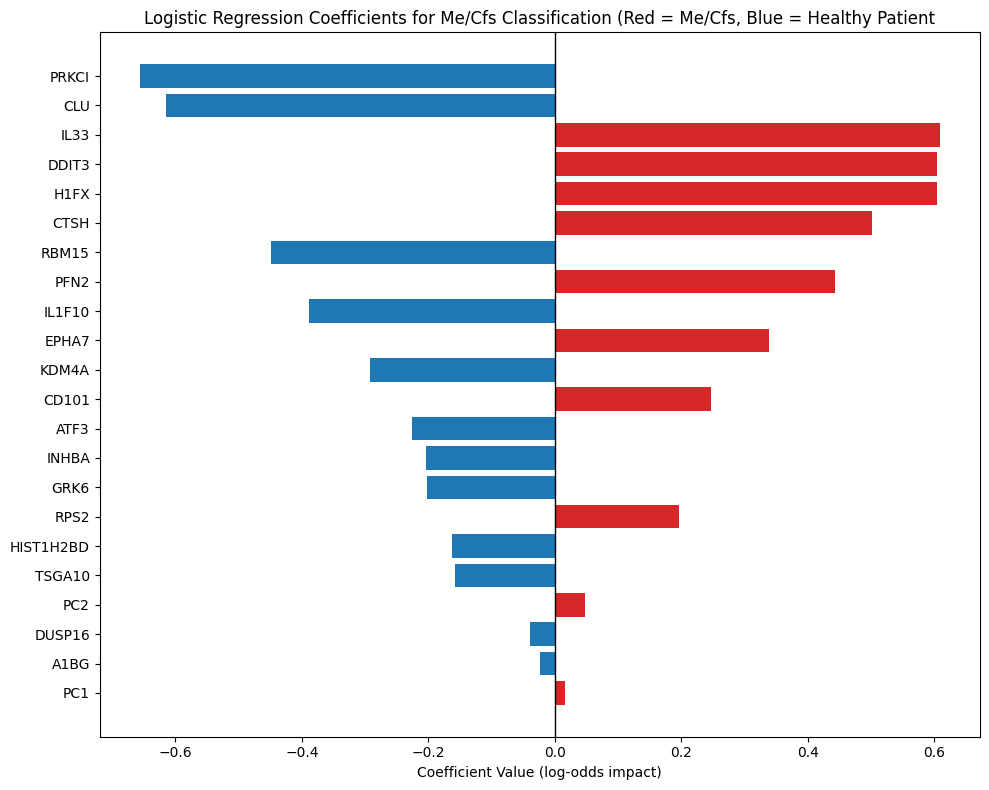

In [1449]:
# === Step 9: Comparison (Positive vs Negative Coefficients) ===

# Color coding:
# Positive coefficient → ME/CFS-associated → one color
# Negative coefficient → Control-associated → another color
colors = ['#d62728' if c > 0 else '#1f77b4' for c in coefficients['Coefficient']]

plt.figure(figsize=(10, 8))
plt.barh(
    coefficients['Feature'][::-1],
    coefficients['Coefficient'][::-1],
    color=colors[::-1],
)
plt.axvline(0, color='black', linewidth=1)
plt.title("Logistic Regression Coefficients for Me/Cfs Classification (Red = Me/Cfs, Blue = Healthy Patient")
plt.xlabel("Coefficient Value (log-odds impact)")
plt.tight_layout()
plt.show()

**Conclusions:**
Logistic Regression on our PCA-reduced set obtained an *AUC* score of *0.4*. This results indicates that logistic regression is a poor predictor of MeCfs on this dataset. An *Area Under the Curve* of 40% implies this classifier can predict MeCfs correctly only 40% of the time, a performance that is near-random.

Coefficient values indicate the first 10 listed bio-indicators account for most of the model's predictive power. Also, our data indicates a trend in which coefficient values decrease by small amounts between different bio-indicators. No large-drops in coefficient magnitude are observed

# Logistic Regression (L1)

In [1450]:
# === Split ===
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_rf, y_binary,
    test_size=0.2,
    random_state=42069,
    stratify=y_binary
)

#X_rf: reduced dataset from PCA
#y_binary: Participant ID vs 0/1 value (1=MeCfs Patient, 2=Healthy Control) 

# === Scale ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_lr)
X_test_scaled = scaler.transform(X_test_lr)

# === Train ===
lr = LogisticRegression(
    solver='liblinear',  # good for small datasets, binary classification
    penalty='l1',
    C=1.0,
    random_state=42
)
lr.fit(X_train_scaled, y_train_lr)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

Logistic Regression Accuracy: 0.471
Logistic Regression AUC: 0.429

Classification Report:
              precision    recall  f1-score   support

     Control       0.33      0.29      0.31         7
      ME/CFS       0.55      0.60      0.57        10

    accuracy                           0.47        17
   macro avg       0.44      0.44      0.44        17
weighted avg       0.46      0.47      0.46        17



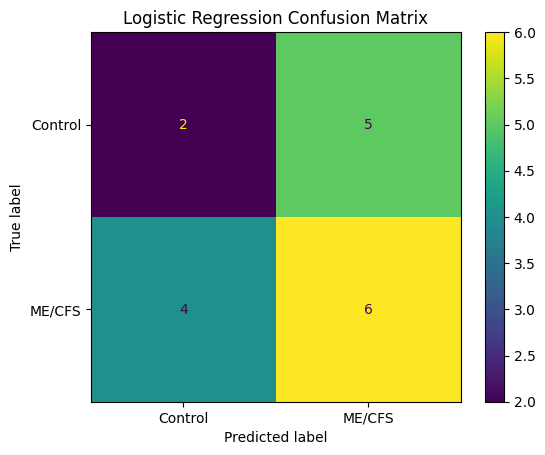

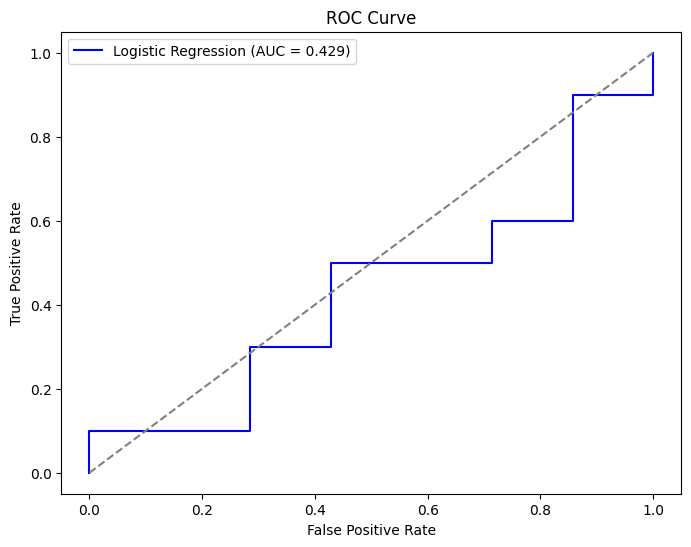

Top features by absolute logistic regression coefficient:


,Feature,Coefficient
5,PRKCI,-0.578392
20,CTSH,0.369974
17,DDIT3,0.283726
3,IL33,0.249247
12,RBM15,-0.218923
21,EPHA7,0.206783
10,TSGA10,-0.089953
7,H1FX,0.069486
9,ATF3,-0.053921
2,INHBA,-0.042587


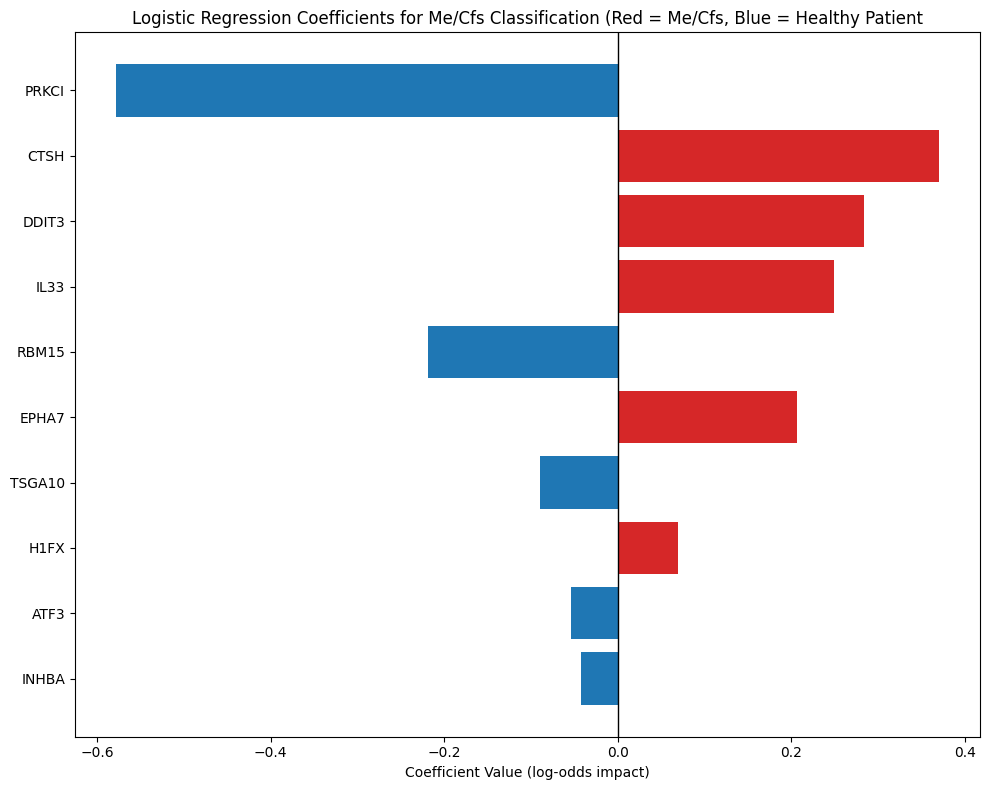

In [1451]:
# === Predict ===
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (ME/CFS)

# === Evaluate ===
acc = accuracy_score(y_test_lr, y_pred)
auc = roc_auc_score(y_test_lr, y_prob)

print(f"Logistic Regression Accuracy: {acc:.3f}")
print(f"Logistic Regression AUC: {auc:.3f}\n")
print("Classification Report:")
print(classification_report(y_test_lr, y_pred, target_names=['Control', 'ME/CFS']))

# === Confusion Matrix ===
cm = confusion_matrix(y_test_lr, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Control', 'ME/CFS'])
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# === ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_test_lr, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# === List Coefficients ===
coefficients = pd.DataFrame({
    'Feature': X_rf.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False)

print("Top features by absolute logistic regression coefficient:")
display(coefficients.head(11))

# === Positive vs Negative Coefficients ===

# Color coding:
# Positive coefficient → ME/CFS-associated → one color
# Negative coefficient → Control-associated → another color
colors = ['#d62728' if c > 0 else '#1f77b4' for c in coefficients.head(10)['Coefficient']]

plt.figure(figsize=(10, 8))
plt.barh(
    coefficients.head(10)['Feature'][::-1],
    coefficients.head(10)['Coefficient'][::-1],
    color=colors[::-1],
)
plt.axvline(0, color='black', linewidth=1)
plt.title("Logistic Regression Coefficients for Me/Cfs Classification (Red = Me/Cfs, Blue = Healthy Patient")
plt.xlabel("Coefficient Value (log-odds impact)")
plt.tight_layout()
plt.show()

**Conclusions:** Logistic Regression with an L1 penalty instead of an L2 penalty on our PCA-reduced set obtained an AUC score of 0.42, meaning no significant improvement was made from the previous calculation. However, the same results can be obtained using an L1 vs an L2 penalty so an L1 penalty is slightly better as it results in fewer bioindicators listed

# Logistic Regression Without PCA (L1)

In [1452]:
merged_df.shape

(103, 1138)

*Original dataset contains 1137 bio-indicators*

/tmp/ipykernel_47/538715619.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_copy = y_copy.replace('HC', 0)


Logistic Regression Accuracy: 0.571
Logistic Regression AUC: 0.657

Classification Report:
              precision    recall  f1-score   support

     Control       0.50      0.44      0.47         9
      ME/CFS       0.62      0.67      0.64        12

    accuracy                           0.57        21
   macro avg       0.56      0.56      0.56        21
weighted avg       0.57      0.57      0.57        21



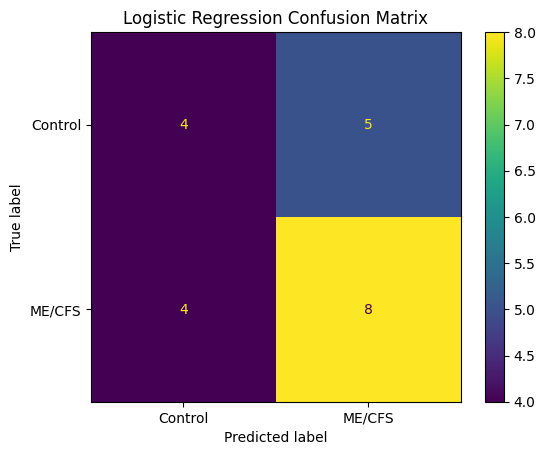

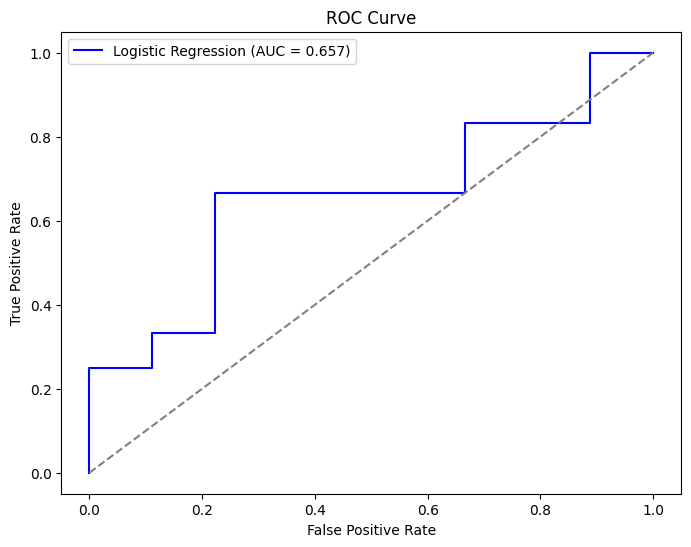

Top features by absolute logistic regression coefficient:


,Feature,Coefficient
982,VIM,-0.993831
214,NRG3,0.843918
586,JUP,-0.828217
717,TNFRSF1B,0.644604
253,PPP1CA,0.576381
749,NFE2L2,0.506937
46,BRCA1.1,0.485754
73,CREBBP,0.481881
825,AXIN1,-0.476645
892,TRAF3IP3,-0.422494


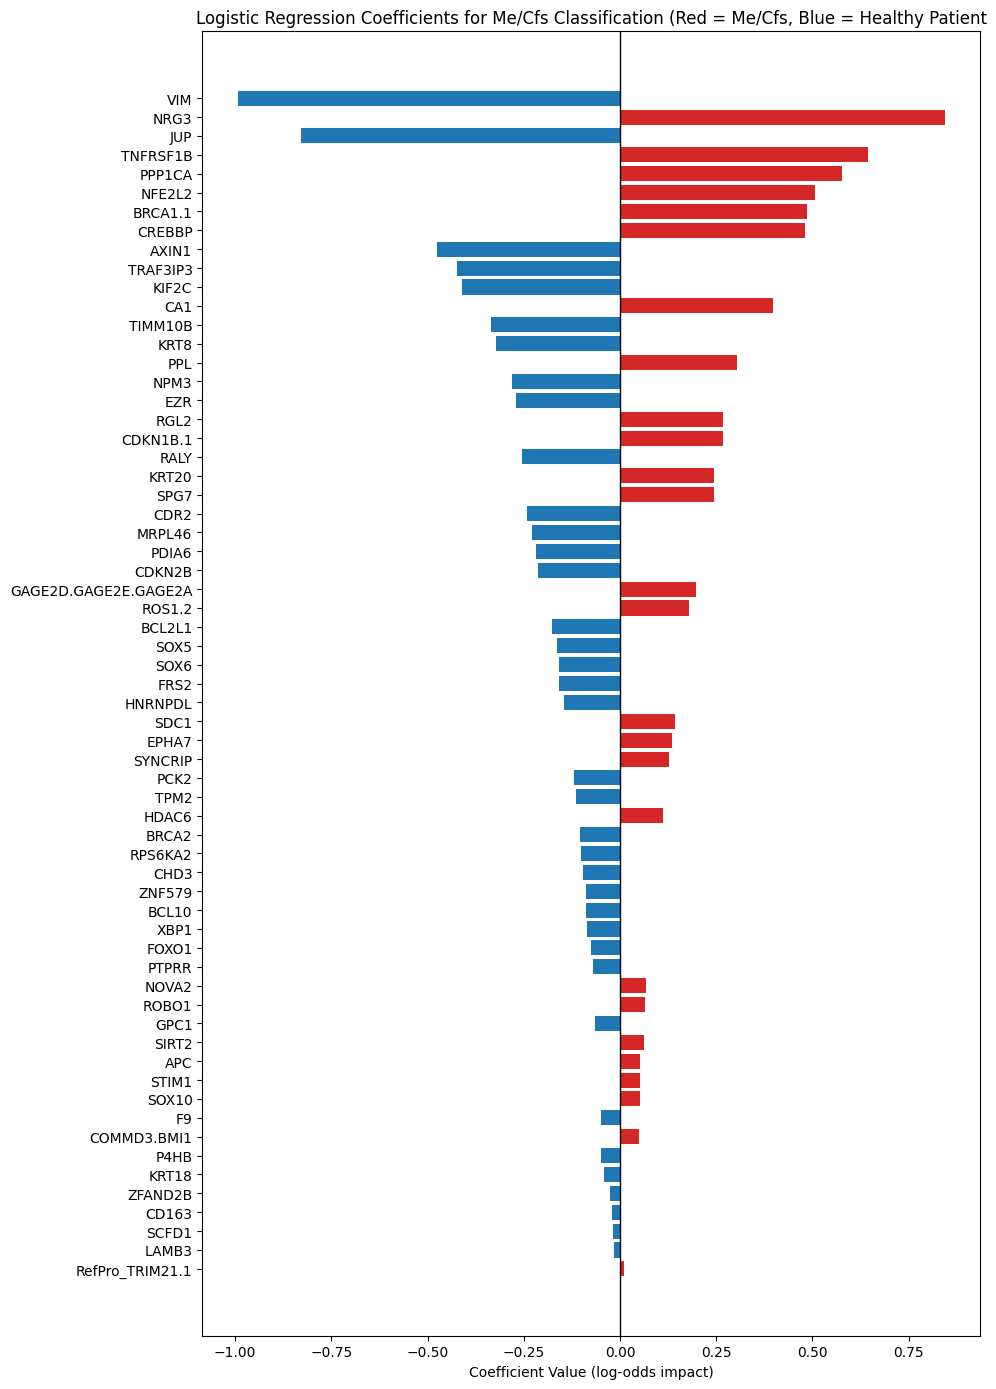

In [1453]:
# === Process Data ===
merged_df_copy, y_copy = merged_df.copy(), y.copy()
merged_df_copy = merged_df_copy.drop(['Sample_Source', 'timepoint', 'cor_id', 'Phenotype'], axis=1)
y_copy = y_copy.replace('ME/CFS', 1)
y_copy = y_copy.replace('HC', 0)

# === Split ===
X_train, X_test, y_train, y_test = train_test_split(
    merged_df_copy, y_copy, test_size=0.2, stratify=y_copy, random_state=42
)

# === Scale ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Train ===
lr = LogisticRegression(
    solver='liblinear',  # good for small datasets, binary classification
    penalty='l1',
    C=1.0,
    random_state=42
)
lr.fit(X_train_scaled, y_train)

# === Predict ===
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (ME/CFS)


# === Evaluate ===
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Logistic Regression Accuracy: {acc:.3f}")
print(f"Logistic Regression AUC: {auc:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Control', 'ME/CFS']))

# === Confusion matrix ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Control', 'ME/CFS'])
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# === ROC curve ===
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# === List Coefficients ===
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False)

TopCoeff = coefficients.head(20)
print("Top features by absolute logistic regression coefficient:")
display(TopCoeff)

# === Positive vs Negative Coefficients ===

# Color coding:
# Positive coefficient → ME/CFS-associated → one color
# Negative coefficient → Control-associated → another color
colors = ['#d62728' if c > 0 else '#1f77b4' for c in coefficients.head(63)['Coefficient']]

plt.figure(figsize=(10, 14))
plt.barh(
    coefficients.head(63)['Feature'][::-1],
    coefficients.head(63)['Coefficient'][::-1],
    color=colors[::-1],
)
plt.axvline(0, color='black', linewidth=1)
plt.title("Logistic Regression Coefficients for Me/Cfs Classification (Red = Me/Cfs, Blue = Healthy Patient")
plt.xlabel("Coefficient Value (log-odds impact)")
plt.tight_layout()
plt.show()

**Dataset Pre-processing:**
* Removed Sample_Source, timepoint, cor_id, phenotype from merged data
* Encoded patient data (1 = Me/Cfs patient, 0 = Healthy Control)

**Conclusions:**
Logistic Regression on our original set obtained an *AUC* score of *0.65*. This results indicates that logistic regression is a poor predictor of MeCfs on this dataset. This new approach although it does represent a significant improvement over the post-PCA attempt which only achieved an AUC score of 0.4. An *Area Under the Curve* of 65% implies this classifier can predict MeCfs correctly only 65% of the time, a performance that is only slightly above-random.

Coefficient values indicate the first 8 listed bio-indicators account for most of the model's predictive power, followed by a sharp drop in coefficient absolute value with the folowing coefficients decreasing by small amounts between different bio-indicators.

# Logistic Regression Without PCA (L2)

/tmp/ipykernel_47/1641795825.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_copy = y_copy.replace('HC', 0)


Logistic Regression Accuracy: 0.524
Logistic Regression AUC: 0.667

Classification Report:
              precision    recall  f1-score   support

     Control       0.44      0.44      0.44         9
      ME/CFS       0.58      0.58      0.58        12

    accuracy                           0.52        21
   macro avg       0.51      0.51      0.51        21
weighted avg       0.52      0.52      0.52        21



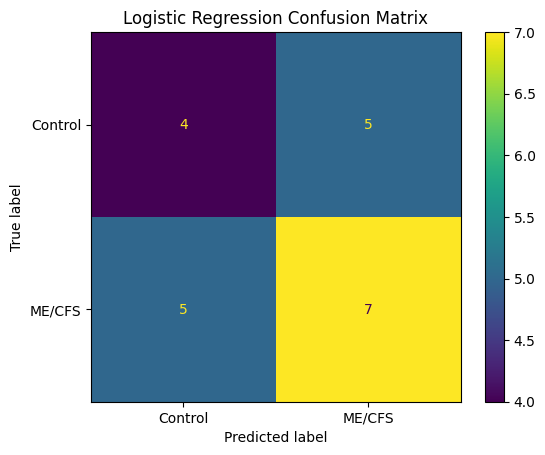

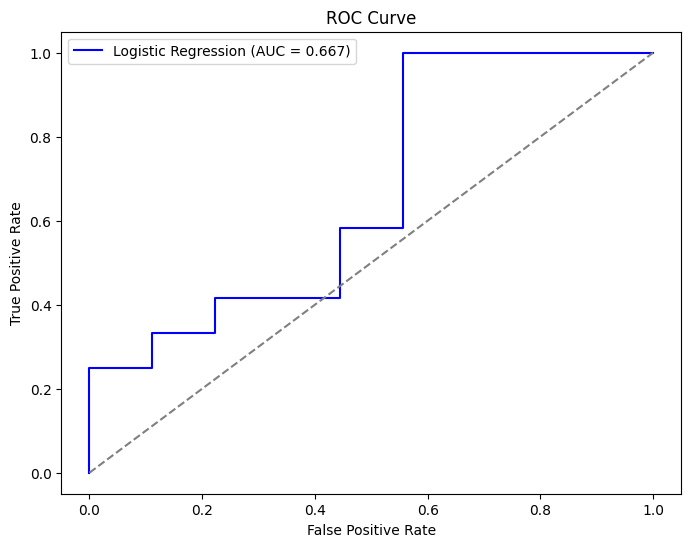

Top features by absolute logistic regression coefficient:


,Feature,Coefficient
982,VIM,-0.249710
598,KRT8,-0.193836
586,JUP,-0.186129
512,FRS2,-0.185173
348,TPM2,-0.182920
710,TIMM10B,-0.182855
46,BRCA1.1,0.180276
1095,KRT8.1,-0.179683
776,SPG7,0.175931
504,ESR1,0.174444


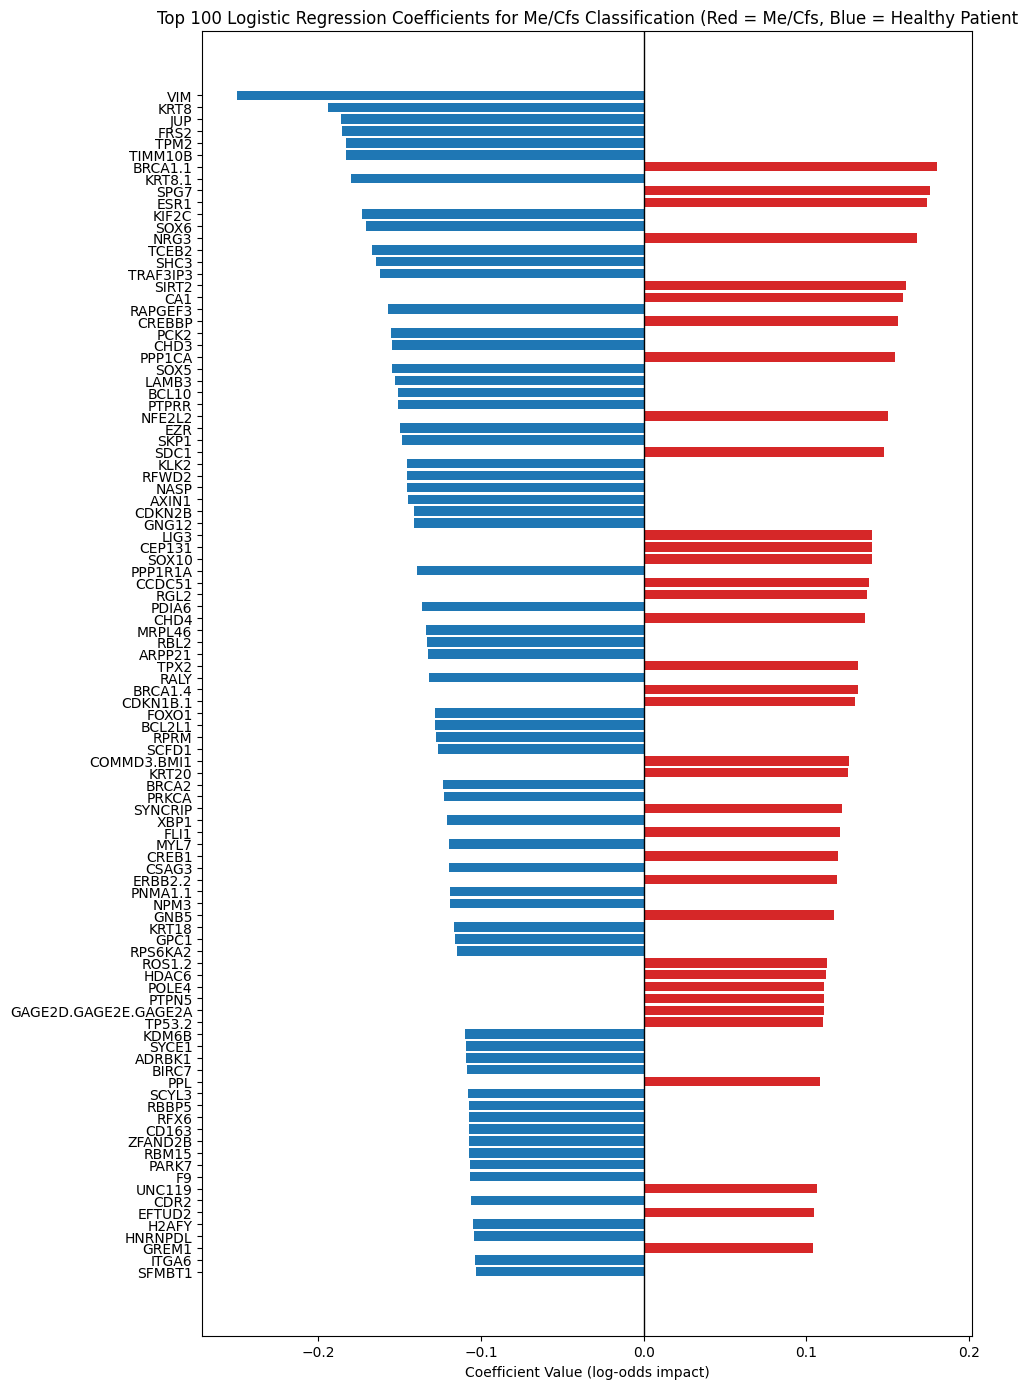

In [1454]:
# === Process Data ===
merged_df_copy, y_copy = merged_df.copy(), y.copy()
merged_df_copy = merged_df_copy.drop(['Sample_Source', 'timepoint', 'cor_id', 'Phenotype'], axis=1)
y_copy = y_copy.replace('ME/CFS', 1)
y_copy = y_copy.replace('HC', 0)

# === Split ===
X_train, X_test, y_train, y_test = train_test_split(
    merged_df_copy, y_copy, test_size=0.2, stratify=y_copy, random_state=42
)

# === Scale ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Train ===
lr = LogisticRegression(
    solver='liblinear',  # good for small datasets, binary classification
    penalty='l2',
    C=1.0,
    random_state=42
)
lr.fit(X_train_scaled, y_train)

# === Predict ===
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (ME/CFS)


# === Evaluate ===
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Logistic Regression Accuracy: {acc:.3f}")
print(f"Logistic Regression AUC: {auc:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Control', 'ME/CFS']))

# === Confusion matrix ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Control', 'ME/CFS'])
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# === ROC curve ===
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# === List Coefficients ===
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False)

TopCoeff = coefficients.head(20)
print("Top features by absolute logistic regression coefficient:")
display(TopCoeff)

# === Positive vs Negative Coefficients ===

# Color coding:
# Positive coefficient → ME/CFS-associated → one color
# Negative coefficient → Control-associated → another color
colors = ['#d62728' if c > 0 else '#1f77b4' for c in coefficients.head(100)['Coefficient']]

plt.figure(figsize=(10, 14))
plt.barh(
    coefficients.head(100)['Feature'][::-1],
    coefficients.head(100)['Coefficient'][::-1],
    color=colors[::-1],
)
plt.axvline(0, color='black', linewidth=1)
plt.title("Top 100 Logistic Regression Coefficients for Me/Cfs Classification (Red = Me/Cfs, Blue = Healthy Patient")
plt.xlabel("Coefficient Value (log-odds impact)")
plt.tight_layout()
plt.show()

**Dataset Pre-processing:**
* Removed Sample_Source, timepoint, cor_id, phenotype from merged data
* Encoded patient data (1 = Me/Cfs patient, 0 = Healthy Control)

**Conclusions:** Logistic Regression on our original set with an L2 penalty obtained an AUC score of 0.67. Still indicating a poor performance for predicting Me/Cfs in our dataset. Using an L2 vs an L1 penalty resulted in coefficients having a less significant difference between each other, as expected